In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sys
import os
import re

In [2]:
df_wines = pd.read_csv('wine-quality/wine_quality_combined.csv')
df_red = pd.read_csv('wine-quality/wine_quality_red.csv')
df_white = pd.read_csv('wine-quality/wine_quality_white.csv')

In [ ]:
df_wines

df_red

df_wines[(df_wines['quality'] < 8) & (df_wines['quality'] >5)]

rj = sns.jointplot(x='quality', y='sulphates', data=df_red,
kind='reg', ylim=(0, 2),
color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12);

rj = sns.jointplot(x='quality', y='sulphates', data=df_white,
kind='reg', ylim=(0, 2),
color='green', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize=12);

df_wines.columns

g = sns.FacetGrid(df_wines,
                    col="wine type",
                    hue='quality_label',
                    col_order=['red', 'white'],
                    hue_order=['low', 'medium', 'high'],
                    aspect=1.2,
                    size=3.5,
                    palette=sns.light_palette('navy', 3))
g.map(plt.scatter,
        "volatile acidity",
        "alcohol",
        alpha=0.9,
        edgecolor='white',
        linewidth=0.5)
        
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

# Explanation:
I have demonstrated before, that higher alcohol precentage are correlated with higher wine quality. therefore, I am going to scatter plot every other wine feature against alcohol and quality label.

x = np.array([4,3,2,3])
y = np.array([5,1,6,4])

fig, sub = plt.subplots(2,1)

plt.figure(figsize = (12, 6))
sns.scatterplot(x, y , ax=sub[0])

# ax.axhline(y=0, color='r', linewidth=4) 
# ax.set_xlabel("vysvětlovaná proměnná")
# ax.set_ylabel("residua")



plt.figure(figsize = (12, 6))
sns.distplot(x, bins = 40, norm_hist=True, ax=sub[1])

# ax.set_title("Histogram reziduí", fontsize = 25)

# def feature_grid()
wine_features = list(df_wines.columns.unique())[:-4]

# fig, sub = plt.subplots(nrows = len(wine_features))
# for ind,feature in enumerate()
for feature in wine_features:
        g = sns.FacetGrid(df_wines,
                        col="wine type",
                        hue='quality_label',
                        col_order=['red', 'white'],
                        hue_order=['low', 'medium', 'high'],
                        aspect=1.2,
                        size=3.5,
                        palette=sns.light_palette('navy', 3))
        g.map(plt.scatter,
                f"{feature}",
                "alcohol",
                alpha=0.9,
                edgecolor='white',
                linewidth=0.5)
                
        fig = g.fig
        fig.subplots_adjust(top=0.8, wspace=0.3)
        fig.suptitle(f'Wine Type - Alcohol - Quality - {feature.capitalize()}', fontsize=14)
        l = g.add_legend(title='Wine Quality Class')

fig,axes = plt.subplots(nrows = len(wine_features), ncols = 1,figsize = (10,60))
plt.subplots_adjust(hspace = 0.2)

for ind,feature in enumerate(wine_features):
        sns.lineplot(data = df_wines, x=feature, y = 'alcohol',hue = 'quality_label', ax=axes[ind], legend = True)

# def feature_grid()
wine_features = list(df_wines.columns.unique())[:-4]

# fig, sub = plt.subplots(nrows = len(wine_features))
# for ind,feature in enumerate()
for feature in wine_features:
        g = sns.FacetGrid(df_wines,
                        col="wine type",
                        hue='quality_label',
                        col_order=['red', 'white'],
                        hue_order=['low', 'medium', 'high'],
                        aspect=1.2,height=3.5)
        g.map(sns.lineplot,
                f"{feature}",
                "alcohol")
                
        fig = g.fig
        fig.subplots_adjust(top=0.8, wspace=0.3)
        fig.suptitle(f'Wine Type - Alcohol - Quality - {feature.capitalize()}', fontsize=14)
        l = g.add_legend(title='Wine Quality Class')

# def feature_grid()
wine_features = list(df_wines.columns.unique())[:-4]

# fig, sub = plt.subplots(nrows = len(wine_features))
# for ind,feature in enumerate()
for feature in wine_features:
        g = sns.FacetGrid(df_wines,
                        col="wine type",
                        hue='quality_label',
                        col_order=['red', 'white'],
                        hue_order=['low', 'medium', 'high'],
                        aspect=1.2,height=3.5)
        g.map(sns.kdeplot,
                f"{feature}")
                
        fig = g.fig
        fig.subplots_adjust(top=0.8, wspace=0.3)
        fig.suptitle(f'Wine Type - Alcohol - Quality - {feature.capitalize()}', fontsize=14)
        l = g.add_legend(title='Wine Quality Class')

In [8]:
pairs = [('residual sugar', 'total sulfur dioxide'), ('density','fixed acidity'), ('residual sugar', 'density'), ('total sulfur dioxide','free sulfur dioxide'),('density','alcohol')]

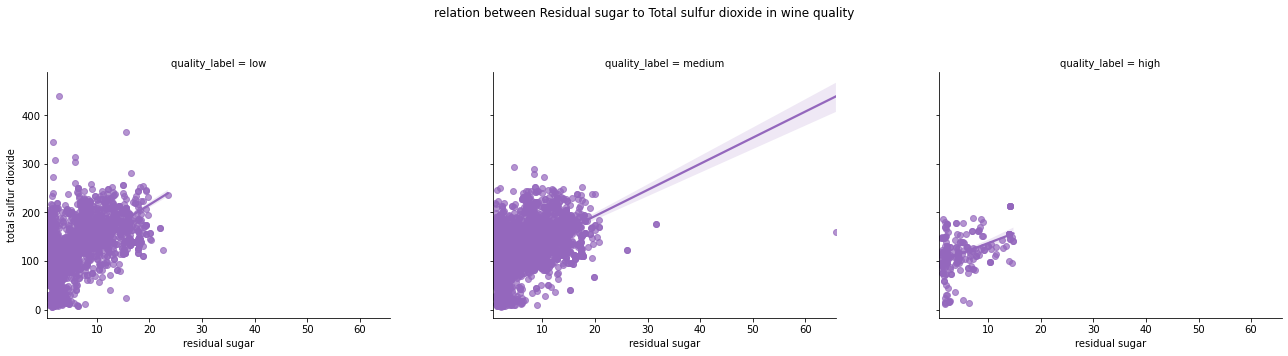

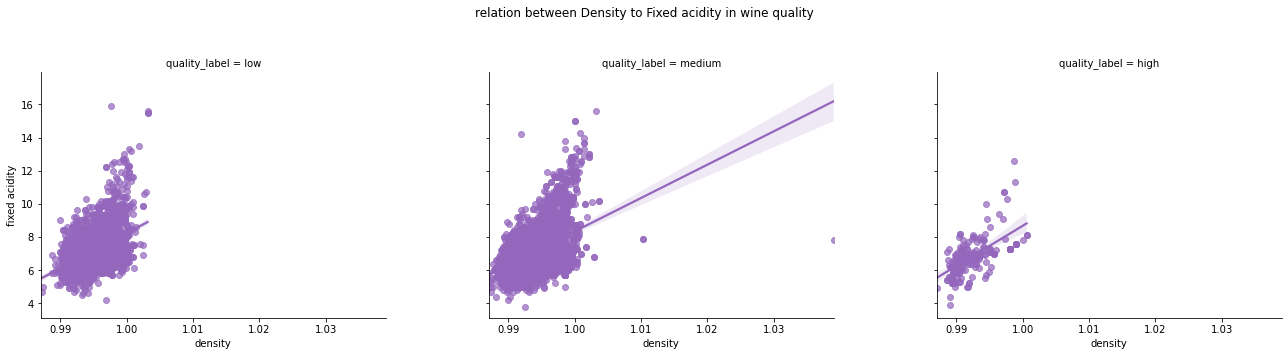

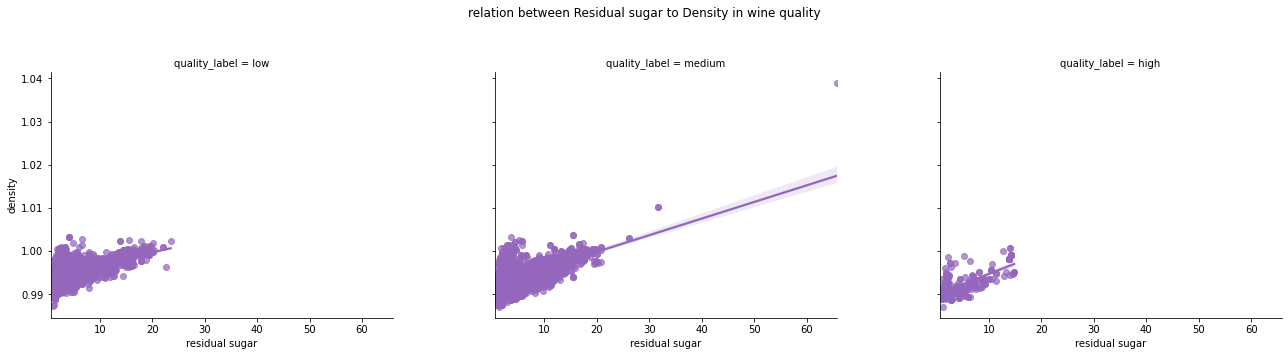

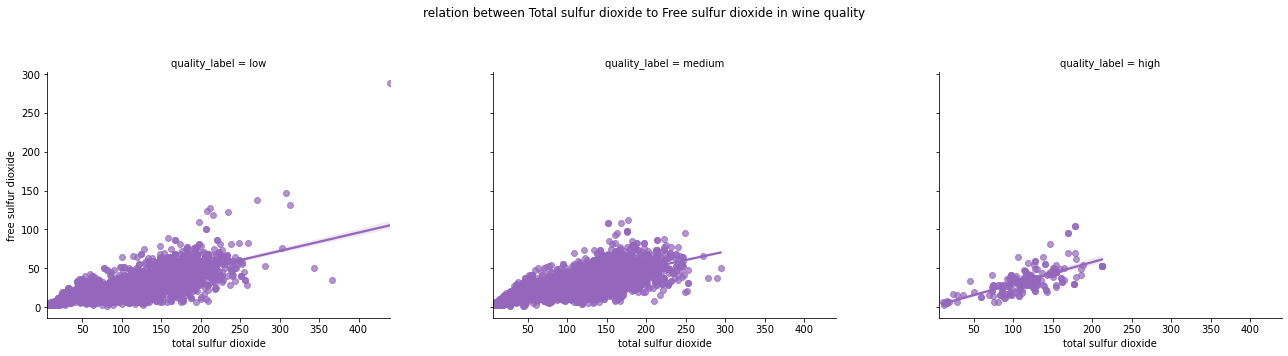

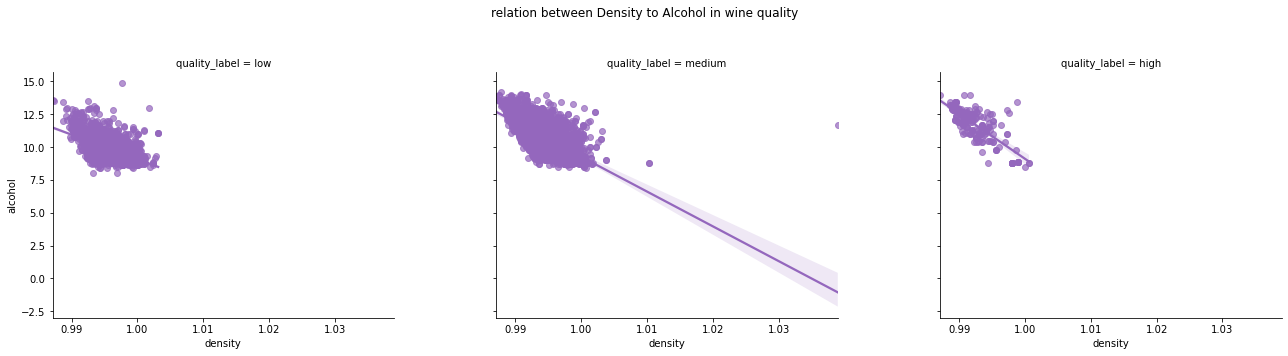

In [14]:
# # def feature_grid()
# wine_features = list(df_wines.columns.unique())[:-4]

# fig, sub = plt.subplots(nrows = len(wine_features))
# for ind,feature in enumerate()
for pair in pairs:
        g= sns.FacetGrid(df_wines,col = 'quality_label',col_order=['low','medium','high'], aspect = 1.2, height = 5.0)
        g.map(sns.regplot, pair[0], pair[1], order=1, scatter_kws={'alpha':0.7},color='tab:purple')
        # ax = g.ax
        fig = g.fig
        fig.subplots_adjust(top=0.8,wspace=0.3)
        fig.suptitle(f'relation between {pair[0].capitalize()} to {pair[1].capitalize()} in wine quality')
        plt.savefig(f'plots/reg/reg-{pair[0]}-{pair[1]}.png')

# for feature in wine_features:
#         g = sns.FacetGrid(df_wines,
#                         col="wine type",
#                         hue='quality_label',
#                         col_order=['red', 'white'],
#                         hue_order=['low', 'medium', 'high'],
#                         aspect=1.2,height=3.5)
#         g.map(sns.regplot,
#                 f"{feature}",
#                 "alcohol", order = 3, scatter_kws = {'alpha': 0.7   })
                
#         fig = g.fig
#         fig.subplots_adjust(top=0.8, wspace=0.3)
#         fig.suptitle(f'Wine Type - Alcohol - Quality - {feature.capitalize()}', fontsize=14)
#         l = g.add_legend(title='Wine Quality Class')

In [5]:
df_wines_numerical=df_wines[df_wines.columns[:-3]]
df_wines_corr_mat=df_wines_numerical.corr()

In [7]:
df_wines_numerical

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 11 columns]

In [4]:
df_wines.columns[:-3]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
corr_pairs = df_wines_corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
negative_corr=sorted_pairs[sorted_pairs <(-0.4)]
positive_corr=sorted_pairs[sorted_pairs >(0.4)]

In [21]:
positive_corr

free sulfur dioxide   residual sugar          0.402871
residual sugar        free sulfur dioxide     0.402871
density               fixed acidity           0.458910
fixed acidity         density                 0.458910
total sulfur dioxide  residual sugar          0.495482
residual sugar        total sulfur dioxide    0.495482
density               residual sugar          0.552517
residual sugar        density                 0.552517
total sulfur dioxide  free sulfur dioxide     0.720934
free sulfur dioxide   total sulfur dioxide    0.720934
fixed acidity         fixed acidity           1.000000
free sulfur dioxide   free sulfur dioxide     1.000000
pH                    pH                      1.000000
density               density                 1.000000
total sulfur dioxide  total sulfur dioxide    1.000000
chlorides             chlorides               1.000000
residual sugar        residual sugar          1.000000
citric acid           citric acid             1.000000
volatile a

In [19]:
negative_corr

alcohol               density                -0.686745
density               alcohol                -0.686745
total sulfur dioxide  volatile acidity       -0.414476
volatile acidity      total sulfur dioxide   -0.414476
dtype: float64

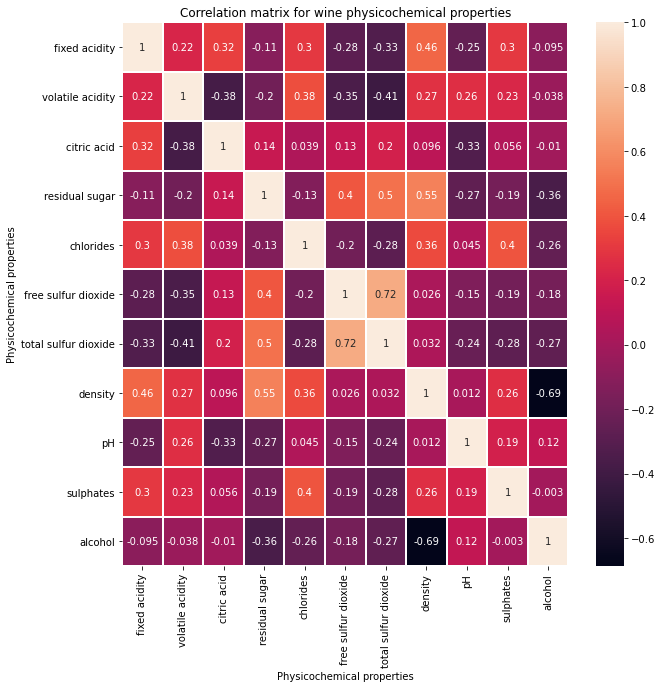

In [13]:
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(df_wines_corr_mat, annot=True, linewidths=1.5)
plt.title('Correlation matrix for wine physicochemical properties')
plt.xlabel('Physicochemical properties')
plt.ylabel('Physicochemical properties')
plt.show()